In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def fit_line(x_fit, y_fit):
    x_array = np.array(x_fit)
    y_array = np.array(y_fit)
    a, b = np.polyfit(x_array, y_array, 1)
    return a, b, x_array

def init(model, density):
    global simfiles_folder, tempfolders_loc, temp_foldernames, temps_str, temps, exentrfile_name, save_to_density, save_to_master, density_global, model_global
    density_global = density
    model_global = model
    simfiles_folder = "simfiles"
    tempfolders_loc = f"./{model}/D{density}/{simfiles_folder}"
    temp_foldernames = os.listdir(tempfolders_loc)
    temps_str = [i[1:] for i in temp_foldernames]
    temps = [float(i[1:]) for i in temp_foldernames]
    

    try:
        exentrfile_name = [i for i in os.listdir(f"./{model}/D{density}") if i[:15] == 'free_energy_rho'][0]
    except:
        print("no entropy file")
        exentrfile_name = None

    #/{temp}/{run}/{kind}

    save_to_density = f""
    save_to_master = f"./master_plots/"

    def titlemaker(model, density, run, kind = '', temp_str = 'all'):
        return plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
    # return simfiles_folder, tempfolders_loc, temp_foldernames, temps_str, temps, exentrfile_name, save_to_density, save_to_master

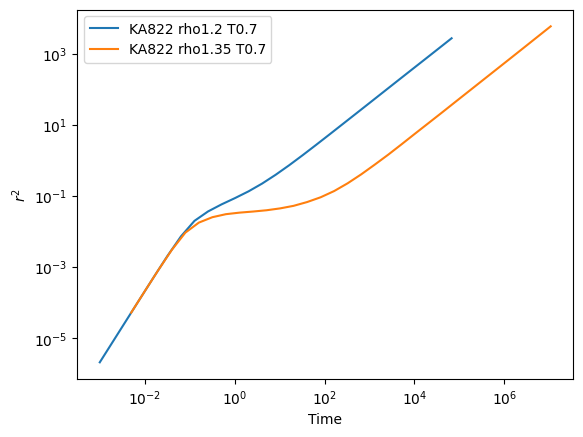

<Figure size 640x480 with 0 Axes>

In [2]:
models = ["KA822"]
densities = ["1.2", "1.35"]

for model_global in  models:
    for density_global in densities:
        init(model_global, density_global)

        kind = 'msd' #Compare two KA systems

        results_df = pd.DataFrame(columns=["temp", "diff_coef"])
        kind = "msd"


        temp_str = 0.7
        runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
        for run in runs[-1:]:
            df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
            # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
            plt.plot(df[0], df[1], label = f"{model_global} rho{density_global} T{temp_str}") #plots the dataframe's given columns
            # titlemaker(model, density, run, kind, temp_str)


            # plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlabel("Time")
plt.ylabel("$r^2$")
plt.show()
plt.clf() #clears the plotter memory so plot's dont's overlap unintentionally
            

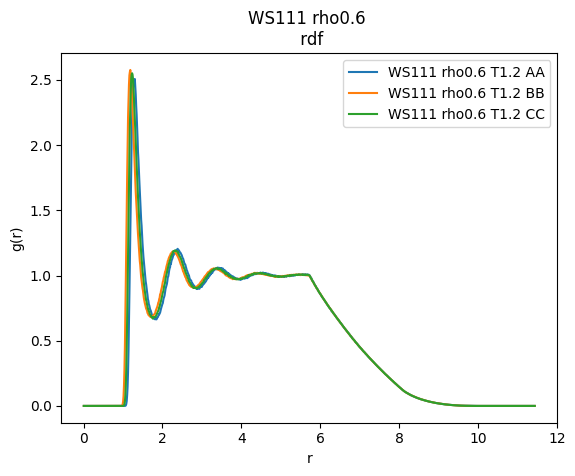

<Figure size 640x480 with 0 Axes>

In [3]:
models = ('KA822', 'KA824', 'WS111')

init(models[2], '0.6')

kind = 'rdf'

for temp_str in temps_str[4:5]: 

    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
        plt.title(f"{model_global} rho{density_global} \n {kind}")

        # plt.yscale("log")
        # plt.xscale("log")
        plt.plot(df[0], df[1], label = f"{model_global} rho{density_global} T{temp_str} AA") #plots the dataframe's given columns
        plt.plot(df[0], df[4], label = f"{model_global} rho{density_global} T{temp_str} BB") #plots the dataframe's given columns
        plt.plot(df[0], df[7], label = f"{model_global} rho{density_global} T{temp_str} CC") #plots the dataframe's given columns
        # titlemaker(model_global, density_global, run, kind, temp_str)
        plt.legend()
        plt.xlabel("r")
        plt.ylabel("g(r)")

        # plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")
plt.show()
plt.clf() #clears the plotter memory so plot's dont's overlap unintentionally


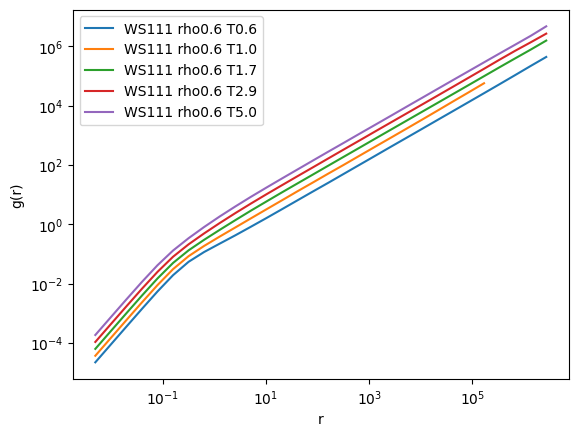

<Figure size 640x480 with 0 Axes>

In [16]:


models = ('KA822', 'KA824', 'WS111')


kind = 'msd'

# for model_inloop in models[2]:

model_inloop = 'WS111'
model = 'WS111'
    # if model_inloop == 'WS111':
    #     init(model_inloop, '0.6')
    # else:
    #     init(model_inloop, '1.2')
init('WS111', '0.6')


for temp_str in temps_str[::3]: 
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)

        # plt.yscale("log")
        plt.plot(df[0], df[1], label = f"{model_inloop} rho{density_global} T{temp_str}") #plots the dataframe's given columns

        # titlemaker(model_global, density_global, run, kind, temp_str)


        # plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")

# plt.title(f"{model_global} rho{density_global} \n {kind}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()
plt.clf() #clears the plotter memory so plot's dont's overlap unintentionally


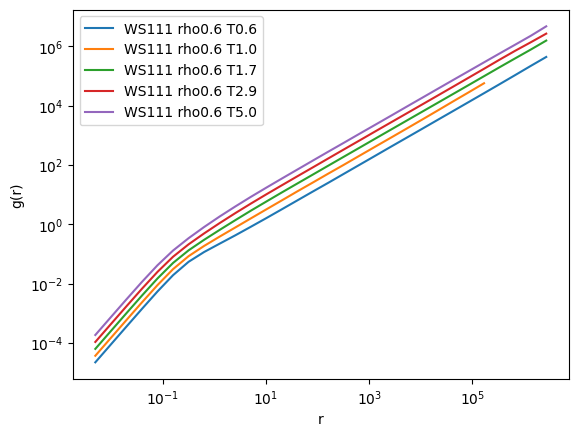

<Figure size 640x480 with 0 Axes>

In [ ]:


models = ('KA822', 'KA824', 'WS111')


kind = 'msd'

# for model_inloop in models[2]:

model_inloop = 'WS111'
model = 'WS111'
    # if model_inloop == 'WS111':
    #     init(model_inloop, '0.6')
    # else:
    #     init(model_inloop, '1.2')
init('WS111', '0.6')


for temp_str in temps_str[::3]: 
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)

        # plt.yscale("log")
        plt.plot(df[0], df[1], label = f"{model_inloop} rho{density_global} T{temp_str}") #plots the dataframe's given columns

        # titlemaker(model_global, density_global, run, kind, temp_str)


        # plt.savefig("./plots/rdf/" + file + "_" + run + "rdf.png")

# plt.title(f"{model_global} rho{density_global} \n {kind}")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("r")
plt.ylabel("g(r)")
plt.show()
plt.clf() #clears the plotter memory so plot's dont's overlap unintentionally
